In [4]:
# Spectrum Separator ™
# Author: Brandon Ruffolo

import numpy as np
import matplotlib.pyplot as plt


# Remove this if you can't run the cell!
%matplotlib notebook  

In [5]:
def get_spectra(file_name):
    """
    Retrieves data from .SSM files generated by the StellarNet Green-Wave miniature spectrometers.

    Parameters
    ----------
    file_name : str
        Name of the .SMM file containing the spectral data. Do not include the .SSM extension.

    Returns
    -------
    wavelengths : Numpy array (float)
        Array of wavelengths at which data was gathered.
        
    intensity : Numpy array (float)
        Array of intensities corresponding to each wavelength in the "wavelengths" array.
        
    integration_time : int
        Integration (or exposure) time [milliseconds] used to gather the spectrum.
        
    number_of_averages : int
        Number of spectra averaged.

    """
    
    # Get all the data without comments
    data = np.loadtxt(file_name+'.SSM',skiprows=2,dtype = str).T
    
    # Extract wavelengths and intensity data and convert them to floating point values
    wavelengths = data[0].astype(float)
    intensity   = data[1].astype(float)
    
    # Get the comments in the file (which contains the parameters used to take the spectrum)
    comments = np.loadtxt(file_name+'.SSM',delimiter = '\n',dtype = str)[1].split('  ')
    
    # Get the integration time and number of spectra averaged 
    integration_time    = int(comments[4].split(':')[1][:-2])
    number_of_averages  = int(comments[5].split(':')[1])
    
    return wavelengths, intensity, integration_time, number_of_averages

### Example

<IPython.core.display.Javascript object>


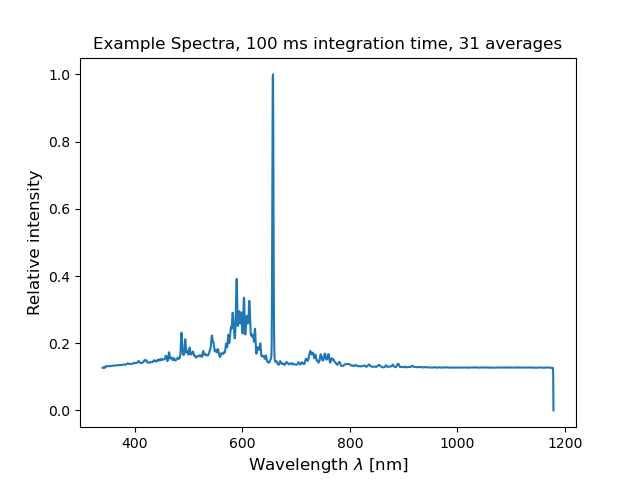

In [6]:
wavelengths, intensity, time, averages = get_spectra('example_spectra')

plt.figure()

# Note the largest value possible for the intensity at a given wavelength is 65535 (2**16-1)
plt.plot(wavelengths,intensity/max(intensity))
plt.xlabel('Wavelength $\lambda$ [nm]',size = 12)
plt.ylabel('Relative intensity', size = 12)
plt.title('Example Spectra, %d ms integration time, %d averages'%(time,averages))
plt.show()